# Model

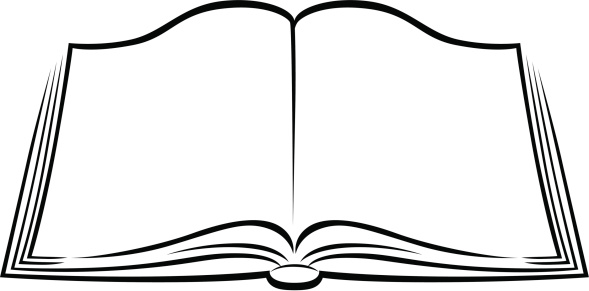

In [1]:
from PIL import Image
image = Image.open('image.jpeg') #save in the same folder
image

# Word Embedding using TF-IDF
The model shall give recommendations based on the book title and description. Before building any NLP model, we need to convert the text data to numerical data in a meaningful way. Such word embedding techniques are: <br>
1. Bag of words <br>
2. TF-IDF <br>
3. Word2vec <br>
4. Latent Semantic Analysis encoding <br>

For this model we use TF-IDF short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document.

## Import libraries

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.metrics.pairwise import linear_kernel
import Functions_Books as funct

## Import test dataframe

In [4]:
df=pd.read_csv('DataFinal\DataPreprocessed.csv',index_col=0)
df.head()
#df.loc[4156,:]

,title,series,authors,isbn,genres,description,pages,year,language,cover_image,total_number_ratings,average_rating,title_tokenized,desccription_tokenized,series_tokenized
283,Mistress Suffragette,none,Diana Forbes,1946409073,"Fiction, Novels, Drama, Contemporary, Historic...",A young woman without prospects at a ball in G...,333,2017,English,https://i.gr-assets.com/images/S/compressed.ph...,12973,4.32,mistress suffragette,young woman without prospects ball gilded age ...,
350,Stones (One True Child #5),none,L.C. Conn,0,"Book Club, Novels, Fiction, Drama, Contemporary","Deep within the New Zealand bush, lies a plate...",327,2019,English,https://i.gr-assets.com/images/S/compressed.ph...,569,4.31,stones one true child 5,deep within new zealand bush lies plateau clea...,
355,Mission: Subhero,none,Linda Armstrong,0,"Contemporary, Novels, Fiction, Drama, Book Clu...","With just a few lines of code, one average man...",225,2017,English,https://i.gr-assets.com/images/S/compressed.ph...,2417,4.35,mission subhero,lines code one average man change world and se...,
356,A Summer of Good-Byes (Blue Triangle Press Boo...,none,Fred Misurella,0,"Fiction, Novels, Adult, Contemporary, Adventur...",PASSION IN PROVENCE:Ben and Lee Alto follow Va...,0,2017,English,https://i.gr-assets.com/images/S/compressed.ph...,1713,4.36,summer good byes blue triangle press book 2,passion provence ben lee alto follow van goghs...,
357,The Scopas Factor,none,Vincent Panettiere,9781543947717,"Fiction, Contemporary, Novels, Drama, Book Clu...","A Hmong ""story cloth,"" a Revolutionary War bat...",326,2018,English,https://i.gr-assets.com/images/S/compressed.ph...,1080,4.31,scopas factor,hmong story cloth revolutionary war battle fla...,


## Reset index and give index column the name 'book_id' - Question

In [5]:
#reset index and give index column the name 'book_id'
df.reset_index(drop=True, inplace=True)
#df.reset_index(drop=False, inplace=True)
#df.index.name = 'book_id'
#df.rename(columns = {'index':'book_id'}, inplace = True)
#df.set_index()
df

,title,series,authors,isbn,genres,description,pages,year,language,cover_image,total_number_ratings,average_rating,title_tokenized,desccription_tokenized,series_tokenized
0,Mistress Suffragette,none,Diana Forbes,1946409073,"Fiction, Novels, Drama, Contemporary, Historic...",A young woman without prospects at a ball in G...,333,2017,English,https://i.gr-assets.com/images/S/compressed.ph...,12973,4.32,mistress suffragette,young woman without prospects ball gilded age ...,
1,Stones (One True Child #5),none,L.C. Conn,0,"Book Club, Novels, Fiction, Drama, Contemporary","Deep within the New Zealand bush, lies a plate...",327,2019,English,https://i.gr-assets.com/images/S/compressed.ph...,569,4.31,stones one true child 5,deep within new zealand bush lies plateau clea...,
2,Mission: Subhero,none,Linda Armstrong,0,"Contemporary, Novels, Fiction, Drama, Book Clu...","With just a few lines of code, one average man...",225,2017,English,https://i.gr-assets.com/images/S/compressed.ph...,2417,4.35,mission subhero,lines code one average man change world and se...,
3,A Summer of Good-Byes (Blue Triangle Press Boo...,none,Fred Misurella,0,"Fiction, Novels, Adult, Contemporary, Adventur...",PASSION IN PROVENCE:Ben and Lee Alto follow Va...,0,2017,English,https://i.gr-assets.com/images/S/compressed.ph...,1713,4.36,summer good byes blue triangle press book 2,passion provence ben lee alto follow van goghs...,
4,The Scopas Factor,none,Vincent Panettiere,9781543947717,"Fiction, Contemporary, Novels, Drama, Book Clu...","A Hmong ""story cloth,"" a Revolutionary War bat...",326,2018,English,https://i.gr-assets.com/images/S/compressed.ph...,1080,4.31,scopas factor,hmong story cloth revolutionary war battle fla...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,The Stove-Junker,none,S.K. Kalsi,9780990779063,none,"In the winter of 2012, 79-year-old Somerset Ga...",338,2015,English,https://i.gr-assets.com/images/S/compressed.ph...,23,3.65,stove junker,winter 2012 79 year old somerset garden travel...,
8133,The Treemakers,The Treemakers Trilogy #1,Christina L. Rozelle,1508840466,"Science Fiction, Dystopia, Fantasy, Young Adul...",This is a previously-published alternate cover...,288,2014,English,https://i.gr-assets.com/images/S/compressed.ph...,535,4.23,treemakers,previously published alternate cover edition a...,treemakers trilogy 1
8134,100 Years: A Journey to End a Vicious Cycle,none,Mark L. Baynard,9780986138003,none,"100 Years, A Journey to End a Vicious Cycle is...",290,2015,English,https://i.gr-assets.com/images/S/compressed.ph...,13,4.00,100 years journey end vicious cycle,100 years journey end vicious cycle true story...,
8135,Thrive: 30 Inspirational Rags-to-Riches Stories,none,Jason Navallo,1511503882,"Nonfiction, Self Help, Inspirational, Business...",Thrive: 30 Inspirational Rags-to-Riches Storie...,100,2015,English,https://i.gr-assets.com/images/S/compressed.ph...,335,3.89,thrive 30 inspirational rags to riches stories,thrive 30 inspirational rags to riches stories...,


## Concat columns title_tokenized, desccription_tokenized, series, author???)

In [6]:
#Check if there are empty rows in column title_tokenized, description_tokenized, series 
df1=df[~df['title_tokenized'].isnull()]
df1.shape

(8137, 15)

In [7]:
df2=df[df['desccription_tokenized'].isnull()]
df2

,title,series,authors,isbn,genres,description,pages,year,language,cover_image,total_number_ratings,average_rating,title_tokenized,desccription_tokenized,series_tokenized


In [10]:
df3=df[df['series_tokenized'].isnull()]
df3

,title,series,authors,isbn,genres,description,pages,year,language,cover_image,total_number_ratings,average_rating,title_tokenized,desccription_tokenized,series_tokenized


In [11]:
df1.loc[75,:]

title                     Mary Me: One Woman’s Incredible Adventure with...
series                                                                 none
authors                                                   Elizabeth Bristol
isbn                                                                      0
genres                    Drama, Nonfiction, Contemporary, Inspirational...
description                                                            None
pages                                                                   346
year                                                                   2020
language                                                            English
cover_image               https://i.gr-assets.com/images/S/compressed.ph...
total_number_ratings                                                    313
average_rating                                                         4.38
title_tokenized                    mary one womans incredible adventure god
desccription

In [12]:
#Concat title tokenized, desccription_tokenized, series_tokenized
df1['combined_features'] = funct.combine_features(df1)
df1.head()

,title,series,authors,isbn,genres,description,pages,year,language,cover_image,total_number_ratings,average_rating,title_tokenized,desccription_tokenized,series_tokenized,combined_features
0,Mistress Suffragette,none,Diana Forbes,1946409073,"Fiction, Novels, Drama, Contemporary, Historic...",A young woman without prospects at a ball in G...,333,2017,English,https://i.gr-assets.com/images/S/compressed.ph...,12973,4.32,mistress suffragette,young woman without prospects ball gilded age ...,,young woman without prospects ball gilded ag...
1,Stones (One True Child #5),none,L.C. Conn,0,"Book Club, Novels, Fiction, Drama, Contemporary","Deep within the New Zealand bush, lies a plate...",327,2019,English,https://i.gr-assets.com/images/S/compressed.ph...,569,4.31,stones one true child 5,deep within new zealand bush lies plateau clea...,,deep within new zealand bush lies plateau cl...
2,Mission: Subhero,none,Linda Armstrong,0,"Contemporary, Novels, Fiction, Drama, Book Clu...","With just a few lines of code, one average man...",225,2017,English,https://i.gr-assets.com/images/S/compressed.ph...,2417,4.35,mission subhero,lines code one average man change world and se...,,lines code one average man change world and ...
3,A Summer of Good-Byes (Blue Triangle Press Boo...,none,Fred Misurella,0,"Fiction, Novels, Adult, Contemporary, Adventur...",PASSION IN PROVENCE:Ben and Lee Alto follow Va...,0,2017,English,https://i.gr-assets.com/images/S/compressed.ph...,1713,4.36,summer good byes blue triangle press book 2,passion provence ben lee alto follow van goghs...,,passion provence ben lee alto follow van gog...
4,The Scopas Factor,none,Vincent Panettiere,9781543947717,"Fiction, Contemporary, Novels, Drama, Book Clu...","A Hmong ""story cloth,"" a Revolutionary War bat...",326,2018,English,https://i.gr-assets.com/images/S/compressed.ph...,1080,4.31,scopas factor,hmong story cloth revolutionary war battle fla...,,hmong story cloth revolutionary war battle f...


## Match Input Title

In [ ]:
EnglishBooksSeries[EnglishBooksSeries['series'].str.match('Harry Potter')]

## Model based on concat column with CountVectorizer and Cosine Similarity

In [13]:
df1=df1[~df1['combined_features'].isnull()]
df1.shape

(8137, 16)

In [14]:
#1.Step - convert the description from combined_features to a matrix of word counts
cm = CountVectorizer().fit_transform(df1['combined_features'])

In [15]:
#2.Get the cosine_simmilarity from the count matrix
cs = cosine_similarity(cm)
#print scores
print(cs)

[[1.         0.03698001 0.01391105 ... 0.03434824 0.01182625 0.02540686]
 [0.03698001 1.         0.06687598 ... 0.12384435 0.01421338 0.04580286]
 [0.01391105 0.06687598 1.         ... 0.05590493 0.02138701 0.04594667]
 ...
 [0.03434824 0.12384435 0.05590493 ... 1.         0.06336889 0.01134485]
 [0.01182625 0.01421338 0.02138701 ... 0.06336889 1.         0.01302027]
 [0.02540686 0.04580286 0.04594667 ... 0.01134485 0.01302027 1.        ]]


**Example of recommendation**

In [20]:
#Get example title to use
title_user = df1['title'][67]
title_user

'Richard III'

In [21]:
indices = df1[df1.title == title_user].index.values[0]
print (indices)

67


In [ ]:
#Find the index of the book the user likes
#def find_indices(title_user):
 #   try:
  #      indices = df1[df1.title == title_user].index.values.astype(int)[0]#.index
   #     return indices
    #except:
     #   return('no match')

In [ ]:
#find_indices(title_user)

In [22]:
#Create a list of tuples in the form (index,similarity)
scores = list(enumerate(cs[indices]))
print(scores)

[(0, 0.008006407690254357), (1, 0.019245008972987525), (2, 0.007239537379384489), (3, 0.025318484177091663), (4, 0.016395645894598822), (5, 0.0), (6, 0.010540925533894595), (7, 0.025565499628245676), (8, 0.015430334996209188), (9, 0.026773977630083295), (10, 0.015381581841179678), (11, 0.016074760739013736), (12, 0.009378205989492577), (13, 0.01253924656438798), (14, 0.02022369785697524), (15, 0.06664830877931141), (16, 0.0), (17, 0.005210029582631955), (18, 0.0069808984715282575), (19, 0.020772565094991858), (20, 0.025762701996477233), (21, 0.007404360971988654), (22, 0.0), (23, 0.03580574370197164), (24, 0.014664711502135329), (25, 0.02067245576486807), (26, 0.033333333333333326), (27, 0.024693239916239743), (28, 0.011152493418636762), (29, 0.007915594835766293), (30, 0.0), (31, 0.012782749814122838), (32, 0.01384091330895666), (33, 0.0), (34, 0.020821287461650722), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.01846372364689991), (41, 0.016878989451394443), (42, 0.0)

In [23]:
# Sort the list of similar books in descending order
sorted_score = sorted(scores, key=lambda x:x[1], reverse=True)
sorted_score = sorted_score[1:]
sorted_score

[(3623, 0.31817964497945234),
 (4548, 0.30625859374250175),
 (6159, 0.30414183920650717),
 (2862, 0.2581988897471611),
 (4710, 0.2581988897471611),
 (4750, 0.2581988897471611),
 (2937, 0.25427381385780384),
 (4512, 0.24917704926002765),
 (3170, 0.24177284024512188),
 (3768, 0.22644357911369417),
 (795, 0.18808869846581971),
 (3911, 0.17799166970046268),
 (4332, 0.17554945190143173),
 (1972, 0.1693240529890391),
 (74, 0.1507151411220547),
 (4311, 0.14907119849998599),
 (6806, 0.14286576923575384),
 (854, 0.14068285846778442),
 (4743, 0.1405456737852613),
 (783, 0.13801311186847084),
 (6154, 0.13471506281091267),
 (5312, 0.1322509360175548),
 (566, 0.13169727955327862),
 (1220, 0.1307302393489203),
 (3294, 0.12909944487358055),
 (5478, 0.12909944487358055),
 (6070, 0.12909944487358055),
 (878, 0.12715213199415368),
 (1823, 0.12552411131335844),
 (3974, 0.1253924656438798),
 (2379, 0.12440333788202981),
 (1862, 0.12421180068162373),
 (6249, 0.11911838308669737),
 (4875, 0.1147695212621917

In [25]:
# Create a loop to print the first 5 books from the sorted list
j=0
print('The 5 most recommended books to '+title_user+' are:\n')
for item in sorted_score:
    book_title = df1[df1.index == item[0]]['title'].values[0]
    print(j+1, book_title)
    j=j+1
    if j >=5:
        break
#Missing to print cover_url

The 5 most recommended books to Richard III are:

1 Richard II
2 Henry V
3 The Winter's Tale
4 King Henry VI, Part 3
5 King Henry IV, Part 1


In [26]:
df1.loc[1314,:]

title                                                                  Room
series                                                                 none
authors                                                       Emma Donoghue
isbn                                                              316098329
genres                    Fiction, Contemporary, Adult, Adult Fiction, T...
description               To five-year-old-Jack, Room is the world....To...
pages                                                                   321
year                                                                   2010
language                                                            English
cover_image               https://i.gr-assets.com/images/S/compressed.ph...
total_number_ratings                                                 767812
average_rating                                                         4.06
title_tokenized                                                        room
desccription

## Model with TfidfVectorizer

In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(df1['title_tokenized'])

In [ ]:
# Calculating the similarity measures based on Cosine Similarity
sg = sk.cosine_similarity(tfidf_matrix, tfidf_matrix)
sg  

In [ ]:
# Get the index corresponding to original_title
indices = pd.Series(df1.index, index = df1['title_tokenized'])      
idx = indices[0]# Get the pairwsie similarity scores 
sig = list(enumerate(sg[idx]))# Sort the books
sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 5 most similar books 
sig = sig[1:6]# Book indicies
movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
rec = df1[['title']].iloc[movie_indices]
rec 

In [ ]:
user = pd.DataFrame({'year':year,
                     'genre':genre,
                     'author':author,
                     'rating':rating,
                     'series':series}, index[0])

## Deal with author, gender

In [ ]:
split in multiple columns: if input is in column1,2,3?
    
Or explode aber dann gibt es wohl mehrmals die selbe Recommendation ...

In [ ]:
 #Search for title in database (options in streamlit that proposes the book title?)
def recommender(title):
    #reset index based on choices
   # df1.reset_index()
    #df1.reset_index() 
  
    # Convert the index into series
    indices = pd.Series(df1.index, index = df1['title'])
    
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(df1['title_tokenized'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = sk.cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
    idx = indices[title]# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 6 most similar books 
    sig = sig[1:6]# Book indicies
    book_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = df1['title'].iloc[book_indices]
       
    # It reads the top 6 recommended book urls and print the images
    
   ## for i in rec['url']:
     #   response = requests.get(i)
      #  img = Image.open(BytesIO(response.content))
       # plt.figure()
        #print(plt.imshow(img))
    return rec
    
   
    

In [ ]:
df1#.drop(['index'], axis = 1)

In [ ]:
recommender('Mission: Subhero')

In [ ]:
#column "pages" (Later EDA: Replace 0 with mean)
#Replace 'None' 0, EDA: Fill later with mean 
#funct.fillup_mean('pages')
funct.replace_in_column(cleaningdata,'pages','None','0')
cleaningdata['pages'].value_counts()